<a href="https://colab.research.google.com/github/robbymugiakbar/Pengolahan-Citra-v3/blob/main/Segmentasi_Citra_Berbasis_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

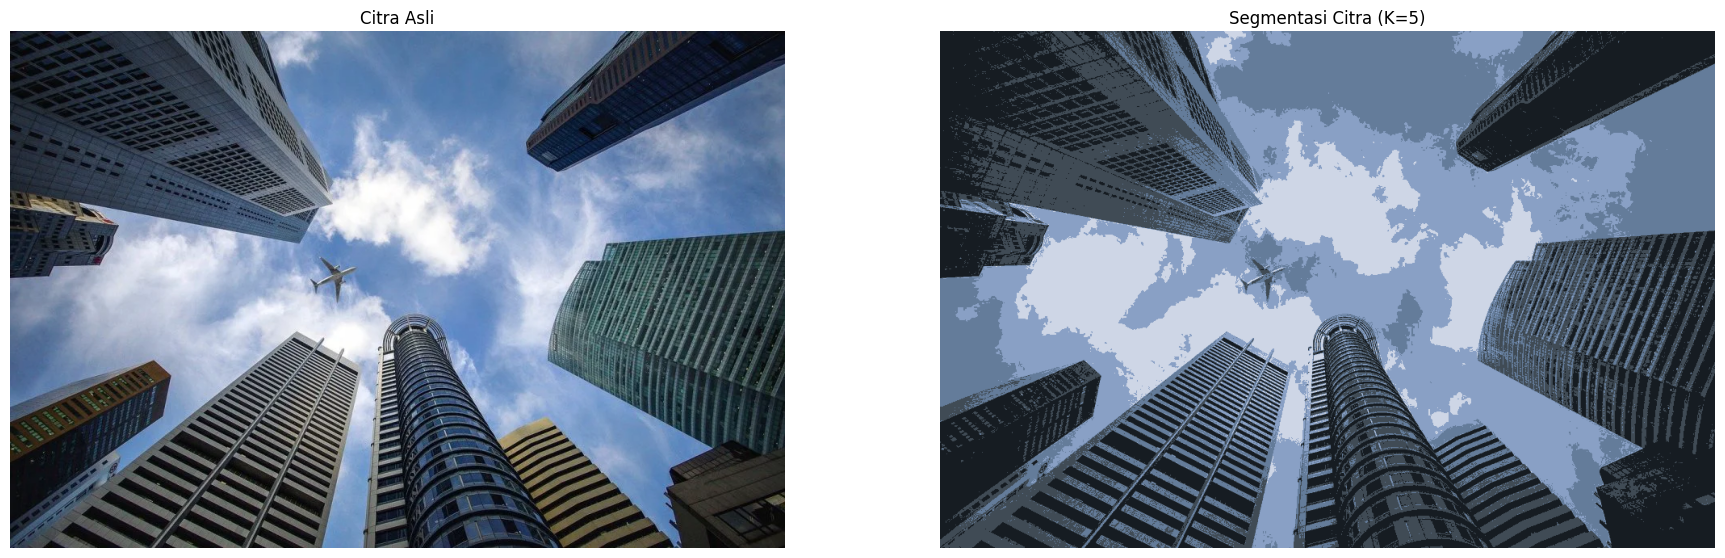

In [12]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Membaca citra
image = cv2.imread('/content/sample_data/image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi ke RGB

# Reshape citra ke dalam bentuk array 2D
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Menentukan jumlah cluster (K)
k = 5

# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixel_values)

# Mendapatkan label dan centroid
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Mengkonversi centroid ke tipe data integer
centroids = np.uint8(centroids)

# Mengganti setiap piksel dengan nilai centroid cluster yang sesuai
segmented_image = centroids[labels.flatten()]

# Reshape kembali ke bentuk citra asli
segmented_image = segmented_image.reshape(image.shape)

# Menampilkan citra asli dan citra hasil segmentasi
plt.figure(figsize=(22, 17))
plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Segmentasi Citra (K={k})')
plt.imshow(segmented_image)
plt.axis('off')

plt.show()